# Present State Analytics : India 

# State Alloted : Rajasthan 

In [48]:
import pandas as pd
import matplotlib.pyplot as plt   
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [20]:
dateCols = ['Date']

data = pd.read_csv("covid_19_india.csv")

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3963 entries, 0 to 3962
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       3963 non-null   int64 
 1   Date                      3963 non-null   object
 2   Time                      3963 non-null   object
 3   State/UnionTerritory      3963 non-null   object
 4   ConfirmedIndianNational   3963 non-null   object
 5   ConfirmedForeignNational  3963 non-null   object
 6   Cured                     3963 non-null   int64 
 7   Deaths                    3963 non-null   int64 
 8   Confirmed                 3963 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 201.3+ KB


In [22]:
data.head(3)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2


In [23]:
data_col = []

for col in data.columns:    
    data_col.append(col)
    
data_col

['Sno',
 'Date',
 'Time',
 'State/UnionTerritory',
 'ConfirmedIndianNational',
 'ConfirmedForeignNational',
 'Cured',
 'Deaths',
 'Confirmed']

In [24]:
data.sample(5).isna()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
1415,False,False,False,False,False,False,False,False,False
3342,False,False,False,False,False,False,False,False,False
3386,False,False,False,False,False,False,False,False,False
3449,False,False,False,False,False,False,False,False,False
263,False,False,False,False,False,False,False,False,False


In [25]:
data.drop(columns=['Sno','Time','ConfirmedIndianNational','ConfirmedForeignNational'],inplace=True)
data 

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,30/01/20,Kerala,0,0,1
1,31/01/20,Kerala,0,0,1
2,01/02/20,Kerala,0,0,2
3,02/02/20,Kerala,0,0,3
4,03/02/20,Kerala,0,0,3
...,...,...,...,...,...
3958,10/07/20,Tripura,1338,1,1776
3959,10/07/20,Uttarakhand,2672,46,3305
3960,10/07/20,Uttar Pradesh,21127,862,32362
3961,10/07/20,West Bengal,16826,854,25911


In [97]:
temp = data["State/UnionTerritory"] == 'Rajasthan'
Rajasthan = data.loc[temp]

temp = data["State/UnionTerritory"] == 'Maharashtra'
Maharashtra = data.loc[temp]

temp = data["State/UnionTerritory"] == 'Delhi'
Delhi = data.loc[temp]

temp = data["State/UnionTerritory"] == 'Gujarat'
Gujarat = data.loc[temp]

temp = data["State/UnionTerritory"] == 'Uttar Pradesh'
UttarPradesh = data.loc[temp]


# Statewise Insights & Analysis

# Rajasthan Analysis : 

In [27]:
Rajasthan.Date[0:124:30]

36      03/03/20
581     02/04/20
1535    02/05/20
2549    01/06/20
3630    01/07/20
Name: Date, dtype: object

<IPython.core.display.Javascript object>


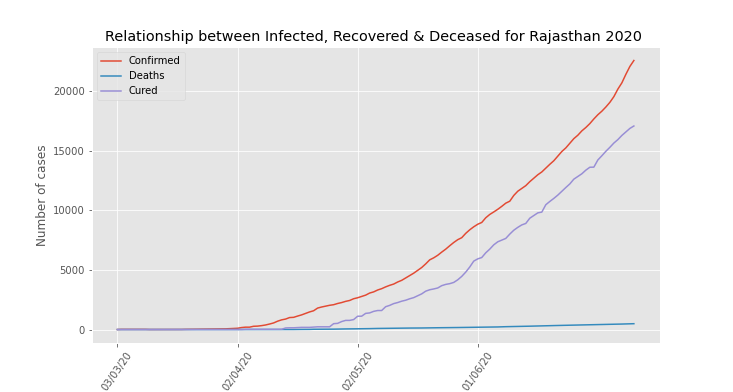

In [91]:
plt.style.use('ggplot')
plt.plot(Rajasthan.Date,Rajasthan.Confirmed,label="Confirmed")
plt.plot(Rajasthan.Date,Rajasthan.Deaths,label="Deaths")
plt.plot(Rajasthan.Date,Rajasthan.Cured,label="Cured")
plt.title("Relationship between Infected, Recovered & Deceased for Rajasthan 2020 ")
plt.xlabel("Months")
plt.ylabel("Number of cases")
plt.xticks(Rajasthan.Date[0:107:30].tolist(),rotation=55)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


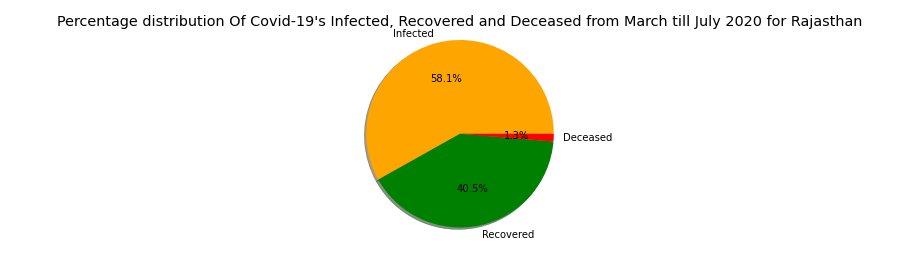

In [70]:
infected = sum(Rajasthan["Confirmed"])
deceased = sum(Rajasthan["Deaths"])
recovered = sum(Rajasthan["Cured"])

labels = ['Infected', 'Recovered', 'Deceased']
sizes = [infected, recovered, deceased]
colors = ['orange', 'green', 'red']
explode = (0, 0, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title("Percentage distribution Of Covid-19's Infected, Recovered and Deceased from March till July 2020 for Rajasthan")
plt.axis('equal')
plt.show()

# Maharashtra Analysis


In [62]:
Maharashtra.Date[0:118:30]

76      09/03/20
757     08/04/20
1723    08/05/20
2757    07/06/20
Name: Date, dtype: object

<IPython.core.display.Javascript object>


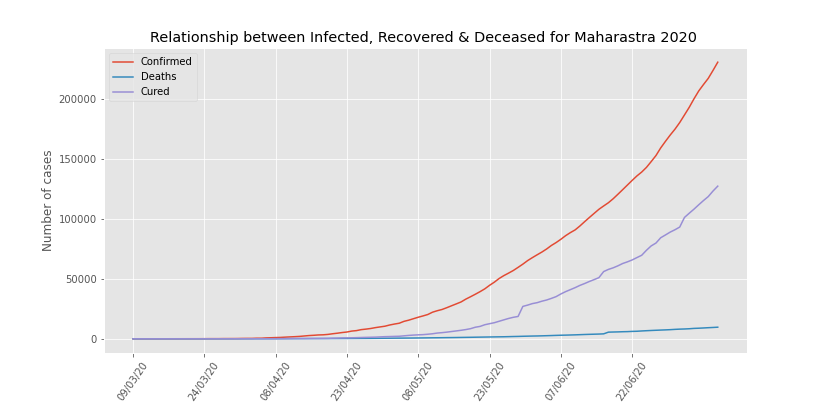

In [92]:
plt.style.use('ggplot')
plt.plot(Maharashtra.Date,Maharashtra.Confirmed,label="Confirmed")
plt.plot(Maharashtra.Date,Maharashtra.Deaths,label="Deaths")
plt.plot(Maharashtra.Date,Maharashtra.Cured,label="Cured")
plt.title("Relationship between Infected, Recovered & Deceased for Maharastra 2020 ")
plt.xlabel("Months")
plt.ylabel("Number of cases")
plt.xticks(Maharashtra.Date[0:118:15].tolist(),rotation=55)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


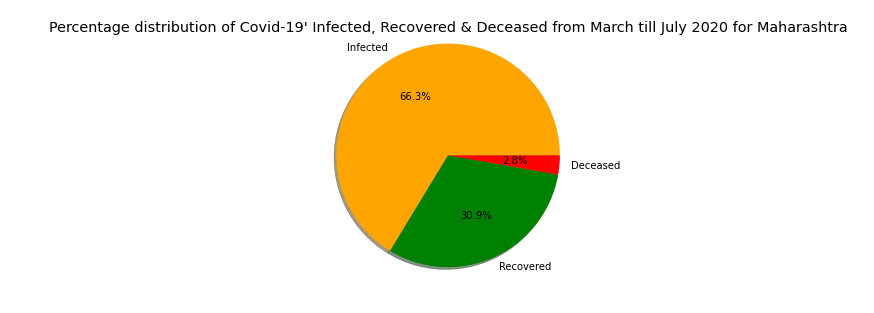

In [77]:
infected = sum(Maharashtra["Confirmed"])
deceased = sum(Maharashtra["Deaths"])
recovered = sum(Maharashtra["Cured"])

labels = ['Infected', 'Recovered', 'Deceased']
sizes = [infected, recovered, deceased]
colors = ['orange', 'green', 'red']
explode = (0, 0, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title("Percentage distribution of Covid-19' Infected, Recovered & Deceased from March till July 2020 for Maharashtra")
plt.axis('equal')
plt.show()

# Delhi Analysis


In [88]:
Delhi.Date[0:125:30]

34      02/03/20
535     01/04/20
1485    01/05/20
2494    31/05/20
3575    30/06/20
Name: Date, dtype: object

<IPython.core.display.Javascript object>


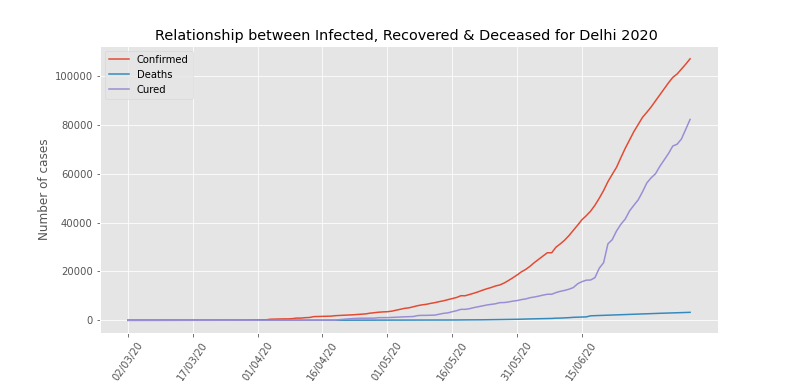

In [90]:
plt.style.use('ggplot')
plt.plot(Delhi.Date,Delhi.Confirmed,label="Confirmed")
plt.plot(Delhi.Date,Delhi.Deaths,label="Deaths")
plt.plot(Delhi.Date,Delhi.Cured,label="Cured")
plt.title("Relationship between Infected, Recovered & Deceased for Delhi 2020 ")
plt.xlabel("Months")
plt.ylabel("Number of cases")
plt.xticks(Delhi.Date[0:110:15].tolist(),rotation=55)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


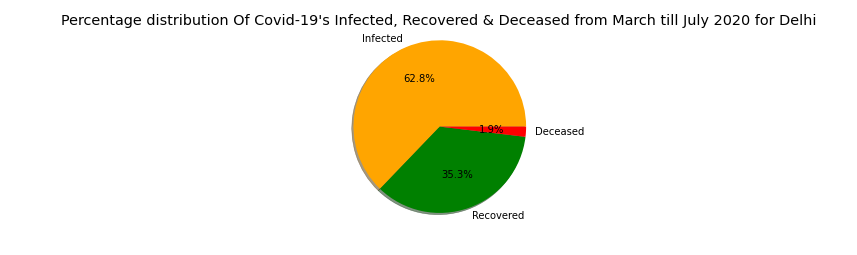

In [94]:
infected = sum(Delhi["Confirmed"])
deceased = sum(Delhi["Deaths"])
recovered = sum(Delhi["Cured"])

labels = ['Infected', 'Recovered', 'Deceased']
sizes = [infected, recovered, deceased]
colors = ['orange', 'green', 'red']
explode = (0, 0, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title("Percentage distribution Of Covid-19's Infected, Recovered & Deceased from March till July 2020 for Delhi")
plt.axis('equal')
plt.show()


# Uttar Pradesh Analysis

In [98]:
UttarPradesh.Date[0:123:30]

39      04/03/20
615     03/04/20
1572    03/05/20
2591    02/06/20
3672    02/07/20
Name: Date, dtype: object

<IPython.core.display.Javascript object>


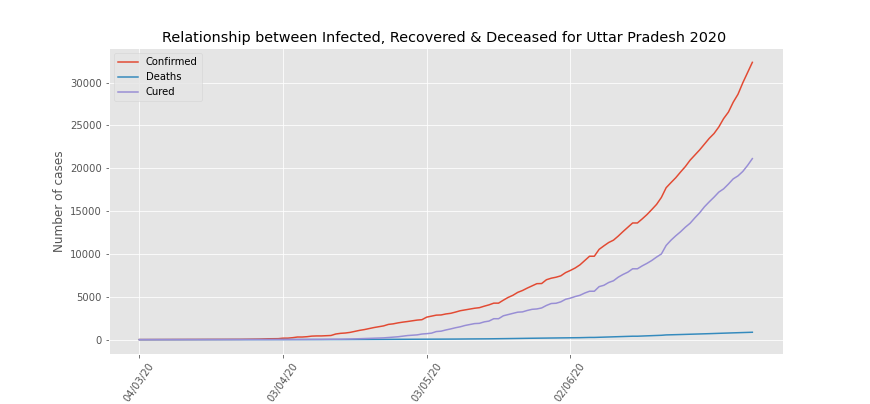

In [99]:
plt.style.use('ggplot')
plt.plot(UttarPradesh.Date,UttarPradesh.Confirmed,label="Confirmed")
plt.plot(UttarPradesh.Date,UttarPradesh.Deaths,label="Deaths")
plt.plot(UttarPradesh.Date,UttarPradesh.Cured,label="Cured")
plt.title("Relationship between Infected, Recovered & Deceased for Uttar Pradesh 2020 ")
plt.xlabel("Months")
plt.ylabel("Number of cases")
plt.xticks(UttarPradesh.Date[0:107:30].tolist(),rotation=55)
plt.legend()
plt.show()

# Gujarat Analysis

In [100]:
Gujarat.Date[0:107:30]

231     20/03/20
1100    19/04/20
2077    19/05/20
3145    18/06/20
Name: Date, dtype: object

<IPython.core.display.Javascript object>


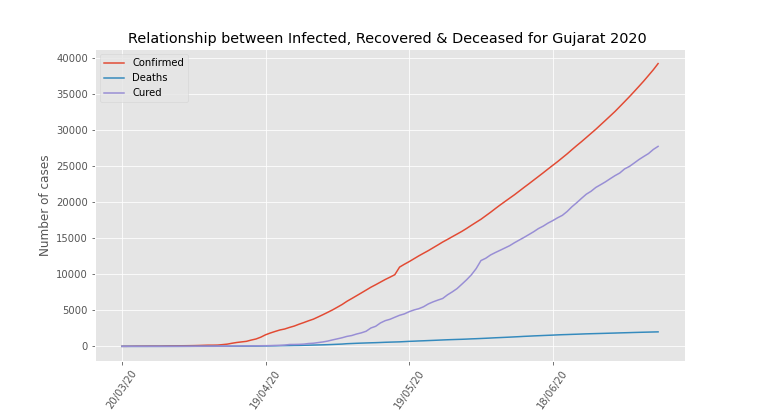

In [101]:
plt.style.use('ggplot')
plt.plot(Gujarat.Date,Gujarat.Confirmed,label="Confirmed")
plt.plot(Gujarat.Date,Gujarat.Deaths,label="Deaths")
plt.plot(Gujarat.Date,Gujarat.Cured,label="Cured")
plt.title("Relationship between Infected, Recovered & Deceased for Gujarat 2020 ")
plt.xlabel("Months")
plt.ylabel("Number of cases")
plt.xticks(Gujarat.Date[0:107:30].tolist(),rotation=55)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


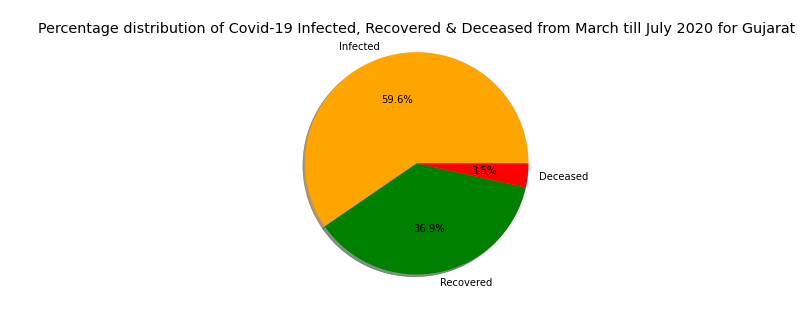

In [102]:
infected = sum(Gujarat["Confirmed"])
deceased = sum(Gujarat["Deaths"])
recovered = sum(Gujarat["Cured"])

labels = ['Infected', 'Recovered', 'Deceased']
sizes = [infected, recovered, deceased]
colors = ['orange', 'green', 'red']
explode = (0, 0, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title("Percentage distribution of Covid-19 Infected, Recovered & Deceased from March till July 2020 for Gujarat")
plt.axis('equal')
plt.show()

# Correlation Heatmap for Various Parameters

In [103]:
data['Mortality Rate'] = (data['Confirmed']/data['Deaths']).round(2)

In [104]:
data['Recovery Rate'] = (data['Cured']/data['Confirmed']).round(2)

<IPython.core.display.Javascript object>


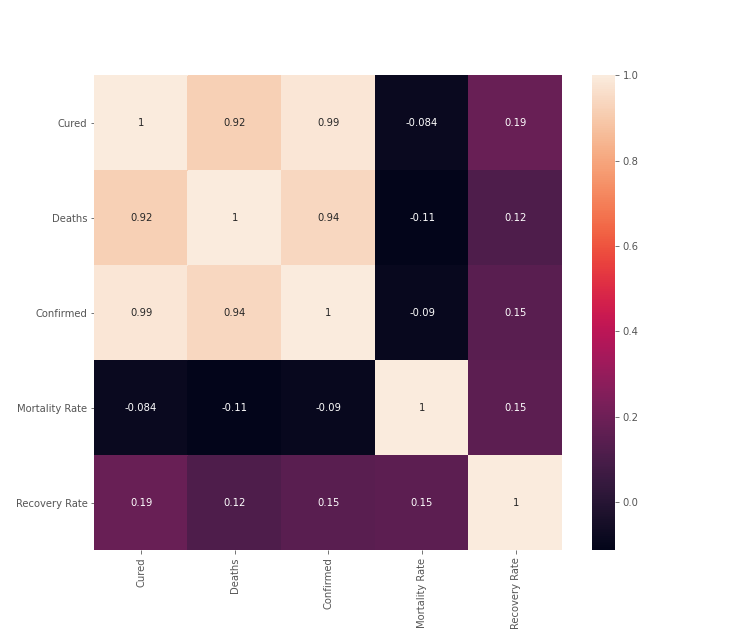

In [105]:
sns.heatmap(data.corr(),annot=True)

# Prediction Model for the Confirmed & Recovered Cases for any dates past 15th July 

In [107]:
data1 = pd.read_csv('state_wise_daily.csv')

In [108]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    342 non-null    object
 1   Status  342 non-null    object
 2   TT      342 non-null    int64 
 3   AN      342 non-null    int64 
 4   AP      342 non-null    int64 
 5   AR      342 non-null    int64 
 6   AS      342 non-null    int64 
 7   BR      342 non-null    int64 
 8   CH      342 non-null    int64 
 9   CT      342 non-null    int64 
 10  DN      342 non-null    int64 
 11  DD      342 non-null    int64 
 12  DL      342 non-null    int64 
 13  GA      342 non-null    int64 
 14  GJ      342 non-null    int64 
 15  HR      342 non-null    int64 
 16  HP      342 non-null    int64 
 17  JK      342 non-null    int64 
 18  JH      342 non-null    int64 
 19  KA      342 non-null    int64 
 20  KL      342 non-null    int64 
 21  LA      342 non-null    int64 
 22  LD      342 non-null    in

In [109]:
data1.head(3)

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,Confirmed,81,0,1,0,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,14-Mar-20,Recovered,9,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,14-Mar-20,Deceased,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
data1['Status'].unique()

array(['Confirmed', 'Recovered', 'Deceased'], dtype=object)

In [111]:
data1['Status'] = data1['Status'].replace("Confirmed", "0")
data1['Status'] = data1['Status'].replace("Recovered", "1")
data1['Status'] = data1['Status'].replace("Deceased", "2")

In [112]:
data1.head(3)

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,0,81,0,1,0,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,14-Mar-20,1,9,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,14-Mar-20,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
data1.drop(columns=['Date'],inplace=True)

In [114]:
data1.columns

Index(['Status', 'TT', 'AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'CT', 'DN', 'DD',
       'DL', 'GA', 'GJ', 'HR', 'HP', 'JK', 'JH', 'KA', 'KL', 'LA', 'LD', 'MP',
       'MH', 'MN', 'ML', 'MZ', 'NL', 'OR', 'PY', 'PB', 'RJ', 'SK', 'TN', 'TG',
       'TR', 'UP', 'UT', 'WB', 'UN'],
      dtype='object')

In [115]:
x = data1[['TT', 'AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'CT', 'DN', 'DD',
       'DL', 'GA', 'GJ', 'HR', 'HP', 'JK', 'JH', 'KA', 'KL', 'LA', 'LD', 'MP',
       'MH', 'MN', 'ML', 'MZ', 'NL', 'OR', 'PY', 'PB', 'RJ', 'SK', 'TN', 'TG',
       'TR', 'UP', 'UT', 'WB', 'UN']] .values  
x[0:5]

array([[81,  0,  1,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0, 14,  0,  2,
         0,  6, 19,  0,  0,  0, 14,  0,  0,  0,  0,  0,  0,  1,  3,  0,
         1,  1,  0, 12,  0,  0,  0],
       [ 9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  0,  0,  4,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [27,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  5,  0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  2,  0,  1,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,
         0,  1,  0,  0,  0,  0,  0]], dtype=int64)

In [116]:
y = data1['Status'].values
y[0:5]

array(['0', '1', '2', '0', '1'], dtype=object)

In [117]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]  #standardization of data

array([[-0.62410051, -0.30964548, -0.49500678, -0.27866908, -0.42847564,
        -0.61339228, -0.37241866, -0.49115977, -0.29132609,  0.        ,
        -0.51095343, -0.39723253, -0.83595179, -0.44054693, -0.54478646,
        -0.55487118, -0.50890019, -0.37444576, -0.1395742 , -0.26519506,
         0.        , -0.86985261, -0.6234089 , -0.37422348, -0.29613429,
        -0.19945398, -0.31694162, -0.55648004, -0.37065319, -0.42428005,
        -0.79315038, -0.16423507, -0.55865834, -0.37231803, -0.39127403,
        -0.61370667, -0.48792806, -0.61735123, -0.0695619 ],
       [-0.63788782, -0.30964548, -0.50127477, -0.27866908, -0.42847564,
        -0.61339228, -0.37241866, -0.49115977, -0.29132609,  0.        ,
        -0.51706856, -0.39723253, -0.83595179, -0.5235101 , -0.54478646,
        -0.58377249, -0.50890019, -0.39872646, -0.49780592, -0.26519506,
         0.        , -0.86985261, -0.63266745, -0.37422348, -0.29613429,
        -0.19945398, -0.31694162, -0.55648004, -0.37065319, -0.

In [118]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=2)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape) #trainning model and predicting

Train set: (273, 39) (273,)
Test set: (69, 39) (69,)


In [121]:
k = 3
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=3)

In [120]:
yhat = neigh.predict(x_test)  
yhat[0:5]

array(['0', '0', '0', '0', '2'], dtype=object)

In [122]:
score = neigh.score(x_test, y_test)
print("Model accuracy is {}".format(score.round(2))) #model accuracy score

Model accuracy is 0.61


# Building a Classifier for Severity Gauging 

In [126]:
data2 = pd.read_csv('PAML_COVID_Dataset.csv')
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3135 entries, 0 to 3134
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      3135 non-null   object
 1   Time                      3135 non-null   object
 2   State/UnionTerritory      3135 non-null   object
 3   ConfirmedIndianNational   3135 non-null   object
 4   Gender                    3135 non-null   object
 5   ConfirmedForeignNational  3135 non-null   object
 6   Age                       3135 non-null   int64 
 7   Serious symptoms          3135 non-null   object
 8   Less common symptoms      3135 non-null   object
 9   Most common symptoms      3135 non-null   object
 10  Severity                  3135 non-null   object
 11  Patient_Status            3135 non-null   object
dtypes: int64(1), object(11)
memory usage: 159.3+ KB


In [127]:
data1.head(3)

,Status,TT,AN,AP,AR,AS,BR,CH,CT,DN,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,0,81,0,1,0,0,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,1,9,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
data1['Status'].unique()

array(['0', '1', '2'], dtype=object)

In [129]:
data1['Status'] = data1['Status'].replace("Confirmed", "0")
data1['Status'] = data1['Status'].replace("Recovered", "1")
data1['Status'] = data1['Status'].replace("Deceased", "2")

In [130]:
data1.head(3)

,Status,TT,AN,AP,AR,AS,BR,CH,CT,DN,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,0,81,0,1,0,0,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,1,9,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
data1.columns

Index(['Status', 'TT', 'AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'CT', 'DN', 'DD',
       'DL', 'GA', 'GJ', 'HR', 'HP', 'JK', 'JH', 'KA', 'KL', 'LA', 'LD', 'MP',
       'MH', 'MN', 'ML', 'MZ', 'NL', 'OR', 'PY', 'PB', 'RJ', 'SK', 'TN', 'TG',
       'TR', 'UP', 'UT', 'WB', 'UN'],
      dtype='object')

In [133]:
x = data1[['TT', 'AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'CT', 'DN', 'DD',
       'DL', 'GA', 'GJ', 'HR', 'HP', 'JK', 'JH', 'KA', 'KL', 'LA', 'LD', 'MP',
       'MH', 'MN', 'ML', 'MZ', 'NL', 'OR', 'PY', 'PB', 'RJ', 'SK', 'TN', 'TG',
       'TR', 'UP', 'UT', 'WB', 'UN']] .values  
x[0:5]

array([[81,  0,  1,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0, 14,  0,  2,
         0,  6, 19,  0,  0,  0, 14,  0,  0,  0,  0,  0,  0,  1,  3,  0,
         1,  1,  0, 12,  0,  0,  0],
       [ 9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  0,  0,  4,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [27,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  5,  0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  2,  0,  1,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,
         0,  1,  0,  0,  0,  0,  0]], dtype=int64)

In [134]:
y = data1['Status'].values
y[0:5]

array(['0', '1', '2', '0', '1'], dtype=object)

In [135]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5] 

array([[-0.62410051, -0.30964548, -0.49500678, -0.27866908, -0.42847564,
        -0.61339228, -0.37241866, -0.49115977, -0.29132609,  0.        ,
        -0.51095343, -0.39723253, -0.83595179, -0.44054693, -0.54478646,
        -0.55487118, -0.50890019, -0.37444576, -0.1395742 , -0.26519506,
         0.        , -0.86985261, -0.6234089 , -0.37422348, -0.29613429,
        -0.19945398, -0.31694162, -0.55648004, -0.37065319, -0.42428005,
        -0.79315038, -0.16423507, -0.55865834, -0.37231803, -0.39127403,
        -0.61370667, -0.48792806, -0.61735123, -0.0695619 ],
       [-0.63788782, -0.30964548, -0.50127477, -0.27866908, -0.42847564,
        -0.61339228, -0.37241866, -0.49115977, -0.29132609,  0.        ,
        -0.51706856, -0.39723253, -0.83595179, -0.5235101 , -0.54478646,
        -0.58377249, -0.50890019, -0.39872646, -0.49780592, -0.26519506,
         0.        , -0.86985261, -0.63266745, -0.37422348, -0.29613429,
        -0.19945398, -0.31694162, -0.55648004, -0.37065319, -0.

In [136]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=2)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (273, 39) (273,)
Test set: (69, 39) (69,)


In [137]:
k = 3
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=3)

In [138]:
yhat = neigh.predict(x_test)  
yhat[0:5]


array(['0', '0', '0', '0', '2'], dtype=object)

In [139]:
score = neigh.score(x_test, y_test)
print("Model accuracy is {}".format(score.round(2)))

Model accuracy is 0.61


# Classifier for Severity Gauging

In [140]:
data2 = pd.read_csv('PAML_COVID_Dataset.csv')
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3135 entries, 0 to 3134
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      3135 non-null   object
 1   Time                      3135 non-null   object
 2   State/UnionTerritory      3135 non-null   object
 3   ConfirmedIndianNational   3135 non-null   object
 4   Gender                    3135 non-null   object
 5   ConfirmedForeignNational  3135 non-null   object
 6   Age                       3135 non-null   int64 
 7   Serious symptoms          3135 non-null   object
 8   Less common symptoms      3135 non-null   object
 9   Most common symptoms      3135 non-null   object
 10  Severity                  3135 non-null   object
 11  Patient_Status            3135 non-null   object
dtypes: int64(1), object(11)
memory usage: 159.3+ KB


In [141]:
data2.drop(columns=["Date","Time"],inplace=True)

In [142]:
data2.columns

Index(['State/UnionTerritory', 'ConfirmedIndianNational', 'Gender ',
       'ConfirmedForeignNational', 'Age ', 'Serious symptoms',
       'Less common symptoms', 'Most common symptoms', 'Severity',
       'Patient_Status '],
      dtype='object')

In [143]:
data2.head(4)

,State/UnionTerritory,ConfirmedIndianNational,Gender,ConfirmedForeignNational,Age,Serious symptoms,Less common symptoms,Most common symptoms,Severity,Patient_Status
0,Kerala,1,Male,0,5,difficulty breathing or shortness of breath,diarrhoea,fever,Seviour,Covid
1,Kerala,1,Female,0,8,chest pain or pressure,sore throat,tiredness,Mild,flu
2,Kerala,2,Male,0,39,loss of speech or movement,conjunctivitis,tiredness,Seviour,flu
3,Kerala,3,Female,0,63,loss of speech or movement,sore throat,tiredness,Seviour,Covid


In [144]:
labelEncoder = LabelEncoder()
x[:,0] = labelEncoder.fit_transform(x[:,0])
x[:,2] = labelEncoder.fit_transform(x[:,2])
x[:,5] = labelEncoder.fit_transform(x[:,5])
x[:,6] = labelEncoder.fit_transform(x[:,6]) 
x[:,7] = labelEncoder.fit_transform(x[:,7])
x[:,8] = labelEncoder.fit_transform(x[:,8])
x[:,9] = labelEncoder.fit_transform(x[:,9])

In [145]:
x1 = pd.DataFrame(x)
x1

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,43.0,-0.309645,1.0,-0.278669,-0.428476,0.0,0.0,0.0,0.0,0.0,...,-0.424280,-0.793150,-0.164235,-0.558658,-0.372318,-0.391274,-0.613707,-0.487928,-0.617351,-0.069562
1,8.0,-0.309645,0.0,-0.278669,-0.428476,0.0,0.0,0.0,0.0,0.0,...,-0.438082,-0.808423,-0.164235,-0.559750,-0.375801,-0.391274,-0.652621,-0.487928,-0.617351,-0.069562
2,2.0,-0.309645,0.0,-0.278669,-0.428476,0.0,0.0,0.0,0.0,0.0,...,-0.438082,-0.816059,-0.164235,-0.559750,-0.375801,-0.391274,-0.672078,-0.487928,-0.617351,-0.069562
3,18.0,-0.309645,0.0,-0.278669,-0.428476,0.0,0.0,0.0,0.0,0.0,...,-0.438082,-0.808423,-0.164235,-0.559750,-0.368835,-0.391274,-0.667213,-0.487928,-0.617351,-0.069562
4,4.0,-0.309645,0.0,-0.278669,-0.428476,0.0,0.0,0.0,0.0,0.0,...,-0.438082,-0.800787,-0.164235,-0.559750,-0.372318,-0.391274,-0.672078,-0.487928,-0.617351,-0.069562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,269.0,6.141040,106.0,-0.004805,2.766163,117.0,2.0,58.0,9.0,0.0,...,0.114010,1.925380,-0.164235,1.856108,4.298431,-0.247231,2.037312,0.127942,2.724267,-0.069562
338,126.0,-0.309645,12.0,-0.278669,-0.428476,4.0,0.0,0.0,0.0,0.0,...,-0.369071,-0.762605,-0.164235,-0.488823,-0.358386,-0.391274,-0.555336,-0.487928,-0.510644,-0.069562
339,285.0,2.915697,126.0,2.459975,5.215897,125.0,7.0,26.0,21.0,0.0,...,1.963521,4.010096,6.443811,3.968619,5.162223,0.665040,4.936407,0.421213,4.409117,-1.971131
340,272.0,2.915697,107.0,0.269060,4.870323,117.0,0.0,30.0,16.0,0.0,...,0.969754,1.383201,2.539057,1.825555,3.685417,-0.199217,2.280524,0.157269,2.443459,-0.069562


In [146]:
x1[1] = x1[1].replace('-',0)
x1[3] = x1[3].replace('-',0)

In [147]:
x = x1[[0,1,2,3,4,5,6,7,8]] .values  
x[0:5]

array([[43.        , -0.30964548,  1.        , -0.27866908, -0.42847564,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 8.        , -0.30964548,  0.        , -0.27866908, -0.42847564,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 2.        , -0.30964548,  0.        , -0.27866908, -0.42847564,
         0.        ,  0.        ,  0.        ,  0.        ],
       [18.        , -0.30964548,  0.        , -0.27866908, -0.42847564,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 4.        , -0.30964548,  0.        , -0.27866908, -0.42847564,
         0.        ,  0.        ,  0.        ,  0.        ]])

In [148]:
y = x1[9].values
y=y.astype('int') 
y[0:5]

array([0, 0, 0, 0, 0])

In [149]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5] #Standardization of data

array([[-0.92374948, -0.30964548, -0.82307772, -0.27866908, -0.42847564,
        -0.70278263, -0.51701414, -0.53226648, -0.32907375],
       [-1.32123604, -0.30964548, -0.85005611, -0.27866908, -0.42847564,
        -0.70278263, -0.51701414, -0.53226648, -0.32907375],
       [-1.38937659, -0.30964548, -0.85005611, -0.27866908, -0.42847564,
        -0.70278263, -0.51701414, -0.53226648, -0.32907375],
       [-1.20766845, -0.30964548, -0.85005611, -0.27866908, -0.42847564,
        -0.70278263, -0.51701414, -0.53226648, -0.32907375],
       [-1.36666308, -0.30964548, -0.85005611, -0.27866908, -0.42847564,
        -0.70278263, -0.51701414, -0.53226648, -0.32907375]])

In [150]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=2)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape) 

Train set: (273, 9) (273,)
Test set: (69, 9) (69,)


In [151]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [152]:
yhat = knn.predict(x_test)
yhat[0:5]

array([0, 0, 0, 0, 0])

In [153]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  1.0
Test set Accuracy:  1.0
